# Análise exploratória de dados

In [1]:
import pandas as pd
import seaborn as sns
from pathlib import Path
from matplotlib import pyplot as plt
from matplotlib import patches
from IPython.display import Markdown
import numpy as np

## 1. Descrição dos dados

In [2]:
dict_path = Path("../data/external/dicionario.csv")
df_dict = pd.read_csv(dict_path)
df_dict

,variavel,significado,valores,tipo
0,gender,Gênero do estudante,"[""Male"", ""Female""]",Nomial
1,NationallTy,Nacionalidade do estudante,"[""Kuwait"", ""Lebanon"", ""Egypt"", ""SaudiArabia"", ...",Nomial
2,PlaceofBirth,Local de nascimento do estudante,"[""Kuwait"", ""Lebanon"", ""Egypt"", ""SaudiArabia"", ...",Nomial
3,StageID,Nivel educacional do estudante,"[""lowerlevel"", ""MiddleSchool"", ""HighSchool""]",Ordinal
4,GradeID,Turma a qual o aluno pertence,"[""G-01"", ""G-02"", ""G-03"", ""G-04"", ""G-05"", ""G-06...",Nomial
5,SectionID,Sala de aula a qual o aluno pertence,"[""A"", ""B"", ""C""]",Nomial
6,Topic,Topico do curso,"[""English"", ""Spanish"", ""French"", ""Arabic"", ""IT...",Nomial
7,Semester,Semestre letivo,"[""First"", ""Second""]",Ordinal
8,Relation,Parente responsavel pelo estudante,"[""Mom"", ""Father""]",Nomial
9,raisedhands,Quantas vezes o estudante levanta sua mão na s...,[0 - 100],Discreta


In [3]:
df = pd.read_csv('../data/raw/data.csv')
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [4]:
display(df.shape)
display(Markdown(f"O conjunto de dados possui **{df.shape[0]}** linhas e **{df.shape[1]}** colunas"))

(480, 17)

O conjunto de dados possui **480** linhas e **17** colunas

In [5]:
display(df.info())
display(Markdown("Não há dados faltantes no dataset"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

None

Não há dados faltantes no dataset

## 2. Perguntas de partida e hipóteses

### 2.1 Distribuição geral dos dados

In [6]:
# genero X desempenho
# Faltas x desempenho
# VisITedResources x desempenho
# raisedhands x desempenho 

In [7]:
df.NationalITy = df.NationalITy.replace(['KW'],'Kuwait')

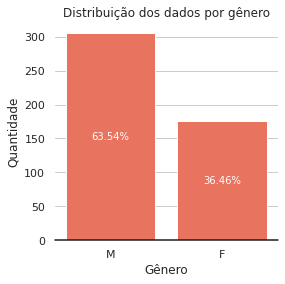

O conjunto de dados e composto por **63.54%** de pessoas do sexo masculino e **36.46%** de pessoas do sexo feminino.

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(4,4))
total = float(len(df))
ax = sns.countplot(x="gender", data=df, color='tomato')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.title('Distribuição dos dados por gênero', fontsize=12)
ax.set(frame_on=False)
ax.axhline(0, color="k", clip_on=False)
ax.bar_label(
    ax.containers[0],
    labels=[f"{value:.2f}%" for value in df.gender.value_counts().to_numpy()/total*100],
    label_type="center",
    color="white"
)
plt.show()
masculino = df.gender.value_counts().to_dict()['M']
feminino = df.gender.value_counts().to_dict()['F']
display(Markdown(f"O conjunto de dados e composto por **{masculino/total*100:.2f}%** de pessoas do sexo masculino e **{feminino/total*100:.2f}%** de pessoas do sexo feminino."))

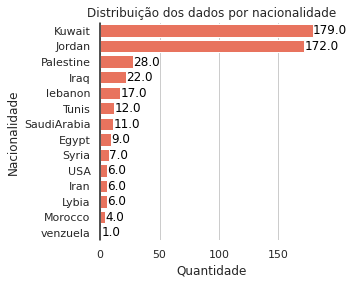

A maior parte das pessoas que responderam a pesquisa possuem nacionalidade do **Kuwait** ou **Jordan**.

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(4,4))
total = float(len(df))
graph_df = (
    df
    .NationalITy
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={"index": "Pais", "NationalITy": "Quantidade"})
)
ax1 = sns.barplot(x="Quantidade", y="Pais", data=graph_df, color='tomato')
ax1.bar_label(
    ax1.containers[0],
    fmt='%.1f',
    label_type='edge',
    color='black'
)
plt.xlabel('Quantidade')
plt.ylabel('Nacionalidade')

plt.title('Distribuição dos dados por nacionalidade', fontsize=12)
ax1.set(frame_on=False)
ax1.axvline(0, color="k", clip_on=False)

    
plt.show()
display(Markdown(f"A maior parte das pessoas que responderam a pesquisa possuem nacionalidade do **{graph_df.iloc[0,0]}** ou **{graph_df.iloc[1,0]}**."))

In [10]:
df.PlaceofBirth.value_counts().to_frame().reset_index().rename(columns={"index": "País", "PlaceofBirth": "Quantidade"})

,País,Quantidade
0,KuwaIT,180
1,Jordan,176
2,Iraq,22
3,lebanon,19
4,SaudiArabia,16
5,USA,16
6,Palestine,10
7,Egypt,9
8,Tunis,9
9,Iran,6


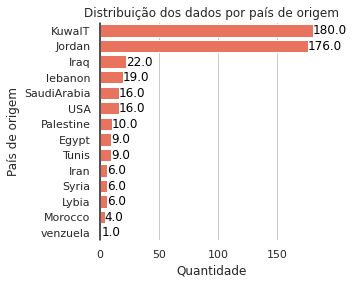

**74.2%** dos participantes da pesquisa tem origem no **KuwaIT** ou **Jordan**.

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(4,4))
total = float(len(df))
graph_df = (
    df
    .PlaceofBirth
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={"index": "Pais", "PlaceofBirth": "Quantidade"})
)
ax1 = sns.barplot(x="Quantidade", y="Pais", data=graph_df, color='tomato')
ax1.bar_label(
    ax1.containers[0],
    fmt='%.1f',
    label_type='edge',
    color='black'
)
plt.xlabel('Quantidade')
plt.ylabel('País de origem')

plt.title('Distribuição dos dados por país de origem', fontsize=12)
ax1.set(frame_on=False)
ax1.axvline(0, color="k", clip_on=False)

plt.show()

primeiro = df.PlaceofBirth.value_counts().to_list()[0]
segundo = df.PlaceofBirth.value_counts().to_list()[1]
display(Markdown(f"**{(primeiro+segundo)/total*100:.1f}%** dos participantes da pesquisa tem origem no **{graph_df.iloc[0,0]}** ou **{graph_df.iloc[1,0]}**."))

In [12]:
df['StageID'] = df['StageID'].replace(	["lowerlevel"],"LowerLevel")

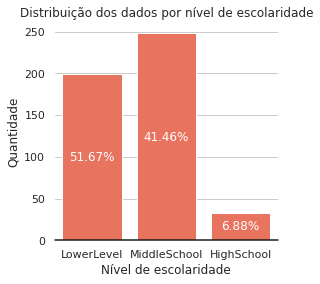

De acordo com o nível de escolaridade os estudantes estão distribuidos em 51,7% como Middle School, 41,5% como Lower Level e 6,9% como High School.

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(4,4))
total = float(len(df))
ax2 = sns.countplot(x="StageID", data=df, color='tomato')
plt.xlabel('Nível de escolaridade')
plt.ylabel('Quantidade')
plt.title('Distribuição dos dados por nível de escolaridade', fontsize=12)
ax2.set(frame_on=False)
ax2.axhline(0, color="k", clip_on=False)
ax2.bar_label(
    ax2.containers[0],
    labels=[f"{value:.2f}%" for value in df.StageID.value_counts().to_numpy()/total*100],
    label_type="center",
    color="white"
)

plt.show()
display(Markdown(f"De acordo com o nível de escolaridade os estudantes estão distribuidos em 51,7% como Middle School, 41,5% como Lower Level e 6,9% como High School."))

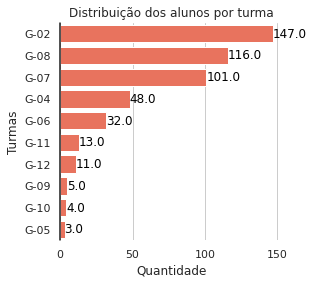

As turmas com a maior quantidade de alunos são a G-02 com 147 alunos, a G-08 com 116 alunos e a G-07 com 101 alunos.

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(4,4))
total = float(len(df))
graph_df = (
    df
    .GradeID
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={"index": "Turma", "GradeID": "Quantidade"})
)
ax1 = sns.barplot(x="Quantidade", y="Turma", data=graph_df, color='tomato')
ax1.bar_label(
    ax1.containers[0],
    fmt='%.1f',
    label_type='edge',
    color='black'
)
plt.xlabel('Quantidade')
plt.ylabel('Turmas')

plt.title('Distribuição dos alunos por turma', fontsize=12)
ax1.set(frame_on=False)
ax1.axvline(0, color="k", clip_on=False)

plt.show()


display(Markdown(f"As turmas com a maior quantidade de alunos são a G-02 com 147 alunos, a G-08 com 116 alunos e a G-07 com 101 alunos."))

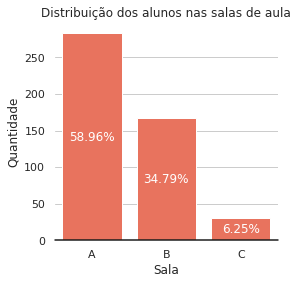

A maior parte dos alunos estão estudam na sala A.

In [15]:
sns.set(style="whitegrid")
plt.figure(figsize=(4,4))
total = float(len(df))
ax2 = sns.countplot(x="SectionID", data=df, color='tomato')
plt.xlabel('Sala')
plt.ylabel('Quantidade')
plt.title('Distribuição dos alunos nas salas de aula', fontsize=12)
ax2.set(frame_on=False)
ax2.axhline(0, color="k", clip_on=False)
ax2.bar_label(
    ax2.containers[0],
    labels=[f"{value:.2f}%" for value in df.SectionID.value_counts().to_numpy()/total*100],
    label_type="center",
    color="white"
)

plt.show()

display(Markdown(f"A maior parte dos alunos estão estudam na sala A."))

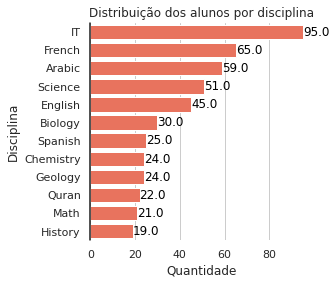

A turma com maior quantidade de alunos é a de **IT**.

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(4,4))
total = float(len(df))
graph_df = (
    df
    .Topic
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={"index": "Disciplina", "Topic": "Quantidade"})
)
ax1 = sns.barplot(x="Quantidade", y="Disciplina", data=graph_df, color='tomato')
ax1.bar_label(
    ax1.containers[0],
    fmt='%.1f',
    label_type='edge',
    color='black'
)
plt.xlabel('Quantidade')
plt.ylabel('Disciplina')

plt.title('Distribuição dos alunos por disciplina', fontsize=12)
ax1.set(frame_on=False)
ax1.axvline(0, color="k", clip_on=False)

plt.show()


display(Markdown(f"A turma com maior quantidade de alunos é a de **{graph_df.iloc[0,0]}**."))

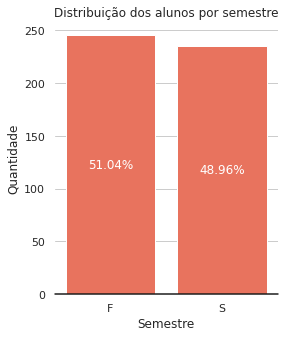

O semestre letivo até então é a variável com melhor balanceamento, havendo uma diferença de **2.1%** na distruição dos participantes da pesquisa.

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(4,5))
total = float(len(df))
ax = sns.countplot(x="Semester", data=df, color='tomato')
plt.xlabel('Semestre')
plt.ylabel('Quantidade')
plt.title('Distribuição dos alunos por semestre', fontsize=12)
ax.set(frame_on=False)
ax.axhline(0, color="k", clip_on=False)
ax.bar_label(
    ax.containers[0],
    labels=[f"{value:.2f}%" for value in df.Semester.value_counts().to_numpy()/total*100],
    label_type="center",
    color="white"
)
plt.show()

primeiro = df.Semester.value_counts().to_list()[0]
segundo = df.Semester.value_counts().to_list()[1]
display(Markdown(f"O semestre letivo até então é a variável com melhor balanceamento, havendo uma diferença de **{(primeiro-segundo)/total*100:.1f}%** na distruição dos participantes da pesquisa."))

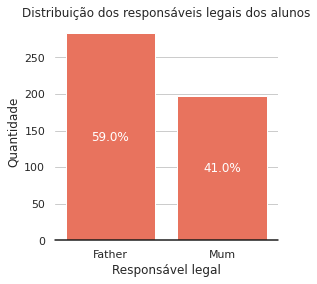

**59.0%** dos participantes da pesquisa tem como responável **Pai** e **41.0%** dos participantes da pesquisa tem como responável **Mãe**.

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(4,4))
total = float(len(df))
graph_df = (
    df
    .Relation
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={"index": "Responsavel", "Relation": "Quantidade"})
)
graph_df.Responsavel = graph_df.Responsavel.replace(['Father','Mum'],['Pai','Mãe'])
ax = sns.countplot(x="Relation", data=df, color='tomato')
plt.xlabel('Responsável legal')
plt.ylabel('Quantidade')
plt.title('Distribuição dos responsáveis legais dos alunos', fontsize=12)
ax.set(frame_on=False)
ax.axhline(0, color="k", clip_on=False)
ax.bar_label(
    ax.containers[0],
    labels=[f"{value:.1f}%" for value in df.Relation.value_counts().to_numpy()/total*100],
    label_type="center",
    color="white"
)
plt.show()


primeiro = df.Relation.value_counts().to_list()[0]
segundo = df.Relation.value_counts().to_list()[1]
display(Markdown(f"**{(primeiro)/total*100:.1f}%** dos participantes da pesquisa tem como responável **{graph_df.iloc[0,0]}** e **{(segundo)/total*100:.1f}%** dos participantes da pesquisa tem como responável **{graph_df.iloc[1,0]}**."))

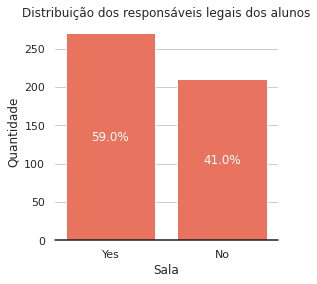

'\n\nsns.set(style="whitegrid")\nplt.figure(figsize=(4,4))\ntotal = float(len(df))\nax4 = sns.countplot(x="ParentAnsweringSurvey", data=df, color=\'tomato\')\nplt.xlabel(\'Sala\')\nplt.ylabel(\'Quantidade\')\nplt.title(\'Distribuição dos alunos nas salas de aula\', fontsize=12)\nax4.set(frame_on=False)\nax4.axhline(0, color="k", clip_on=False)\nfor p in ax4.patches:\n    percentage = \'{:.1f}%\'.format(100 * p.get_height()/total)\n    x = p.get_x() + p.get_width()\n    y = p.get_height()\n    ax4.annotate(percentage, (x, y),ha=\'right\')\nplt.show()\n'

In [19]:
sns.set(style="whitegrid")
plt.figure(figsize=(4,4))
total = float(len(df))

ax = sns.countplot(x="ParentAnsweringSurvey", data=df, color='tomato')
plt.xlabel('Sala')
plt.ylabel('Quantidade')
plt.title('Distribuição dos responsáveis legais dos alunos', fontsize=12)
ax.set(frame_on=False)
ax.axhline(0, color="k", clip_on=False)
ax.bar_label(
    ax.containers[0],
    labels=[f"{value:.1f}%" for value in df.Relation.value_counts().to_numpy()/total*100],
    label_type="center",
    color="white"
)
plt.show()
"""

sns.set(style="whitegrid")
plt.figure(figsize=(4,4))
total = float(len(df))
ax4 = sns.countplot(x="ParentAnsweringSurvey", data=df, color='tomato')
plt.xlabel('Sala')
plt.ylabel('Quantidade')
plt.title('Distribuição dos alunos nas salas de aula', fontsize=12)
ax4.set(frame_on=False)
ax4.axhline(0, color="k", clip_on=False)
for p in ax4.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax4.annotate(percentage, (x, y),ha='right')
plt.show()
"""

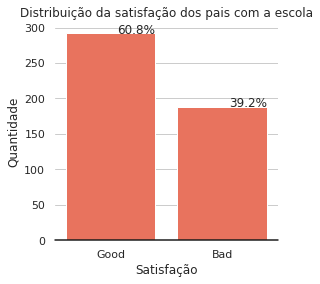

In [20]:
sns.set(style="whitegrid")
plt.figure(figsize=(4,4))
total = float(len(df))
ax4 = sns.countplot(x="ParentschoolSatisfaction", data=df, color='tomato')
plt.xlabel('Satisfação')
plt.ylabel('Quantidade')
plt.title('Distribuição da satisfação dos pais com a escola', fontsize=12)
ax4.set(frame_on=False)
ax4.axhline(0, color="k", clip_on=False)
for p in ax4.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax4.annotate(percentage, (x, y),ha='right')
plt.show()

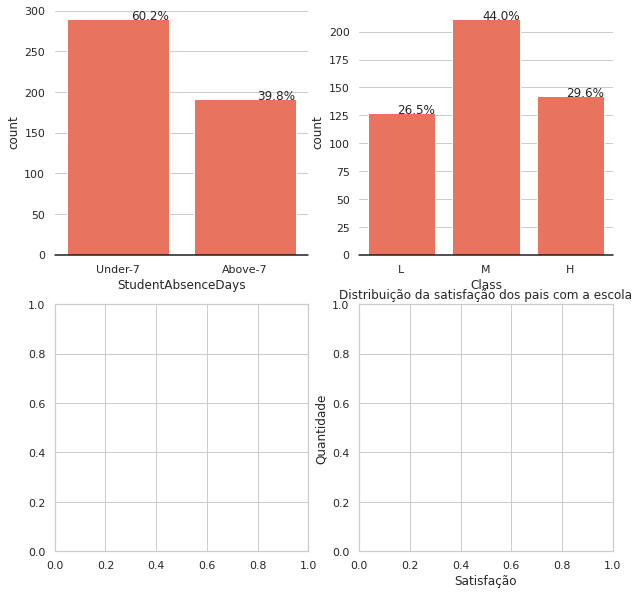

In [21]:
fig, axes  = plt.subplots(2,2,figsize=(10,10))

sns.set(style="whitegrid")
total = float(len(df))
ax4 = sns.countplot(x="StudentAbsenceDays", data=df, color='tomato',ax=axes[0,0])
plt.xlabel('Satisfação')
plt.ylabel('Quantidade')
plt.title('Distribuição da satisfação dos pais com a escola', fontsize=12)
ax4.set(frame_on=False)
ax4.axhline(0, color="k", clip_on=False)
for p in ax4.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax4.annotate(percentage, (x, y),ha='right')

sns.set(style="whitegrid")
total = float(len(df))
ax4 = sns.countplot(x="Class", data=df, color='tomato', order=['L','M','H'],ax=axes[0,1])
plt.xlabel('Satisfação')
plt.ylabel('Quantidade')
plt.title('Distribuição da satisfação dos pais com a escola', fontsize=12)
ax4.set(frame_on=False)
ax4.axhline(0, color="k", clip_on=False)
for p in ax4.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax4.annotate(percentage, (x, y),ha='right')
plt.show()

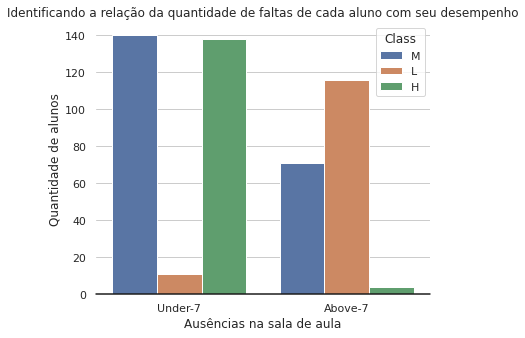

In [22]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,5))

ax = sns.countplot(x='StudentAbsenceDays', data=df, hue='Class')
plt.xlabel('Ausências na sala de aula')
plt.ylabel('Quantidade de alunos')
plt.title('Identificando a relação da quantidade de faltas de cada aluno com seu desempenho', fontsize=12)
ax.set(frame_on=False)
ax.axhline(0, color="k", clip_on=False)
plt.show()

No gráfico acima nós percebemos que os alunos que tiveram menos de 7 faltas, nos níveis intermediário e avançado, acabaram tendo um desempenho melhor com relação aos alunos que tiveram mais de 7 faltas

<AxesSubplot:xlabel='Semester', ylabel='count'>

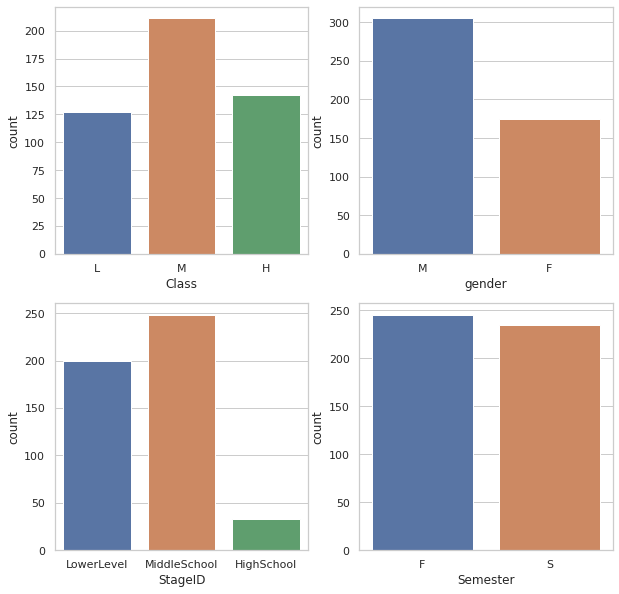

In [23]:
sns.set_theme(style="whitegrid")

fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.countplot(x='Class', data=df, ax=axarr[0,0], order=['L','M','H'])
sns.countplot(x='gender', data=df, ax=axarr[0,1], order=['M','F'])
sns.countplot(x='StageID', data=df, ax=axarr[1,0])
sns.countplot(x='Semester', data=df, ax=axarr[1,1])


# Modificar valores para porcentagem e exibir nas colunas

## 3. Insights